In [2]:
import numpy as np

from load_data_mongoloids import load_data_mongoloids
from mongoloids_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config

from transform_data import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats

from configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'font.size':fontsize}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 

plt.style.use('ggplot')
%matplotlib inline

import igraph
import cairo

In [3]:
#from load_data_down_GSE63347 import load_data_down_GSE63347
#from down_GSE63347_config import config

from configurations.load_data_down_GSE63347 import load_data_down_GSE63347_cpg_horvath
from configurations.config_down_GSE63347_cpg_horvath import config
X, y, _, genes_names = load_data_down_GSE63347_cpg_horvath()


Data loaded:  0.0470566686181
float32 (353L, 71L)
(71L, 353L) 353


In [4]:
config.params["normal_mask"].value

array([ 2,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       65, 67, 68, 69, 70], dtype=int64)

In [9]:
X, y, _, genes_names = load_data_down_GSE63347_cpg_horvath()
#X, y, _, genes_names = load_data_cancer()
#X, y, _, cpgs_names = load_data_mongoloids_hannum_cpgs()
#X, y, _, cpgs_names = load_data_mongoloids_horvath_cpgs()
from load_parenclitics import load_parenclitics
parenclitics = load_parenclitics(config)

Data loaded:  0.0641733522134
float32 (353L, 71L)
(71L, 353L) 353


In [2]:
print config.params["kde_mask"].value


siblings_mask


<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

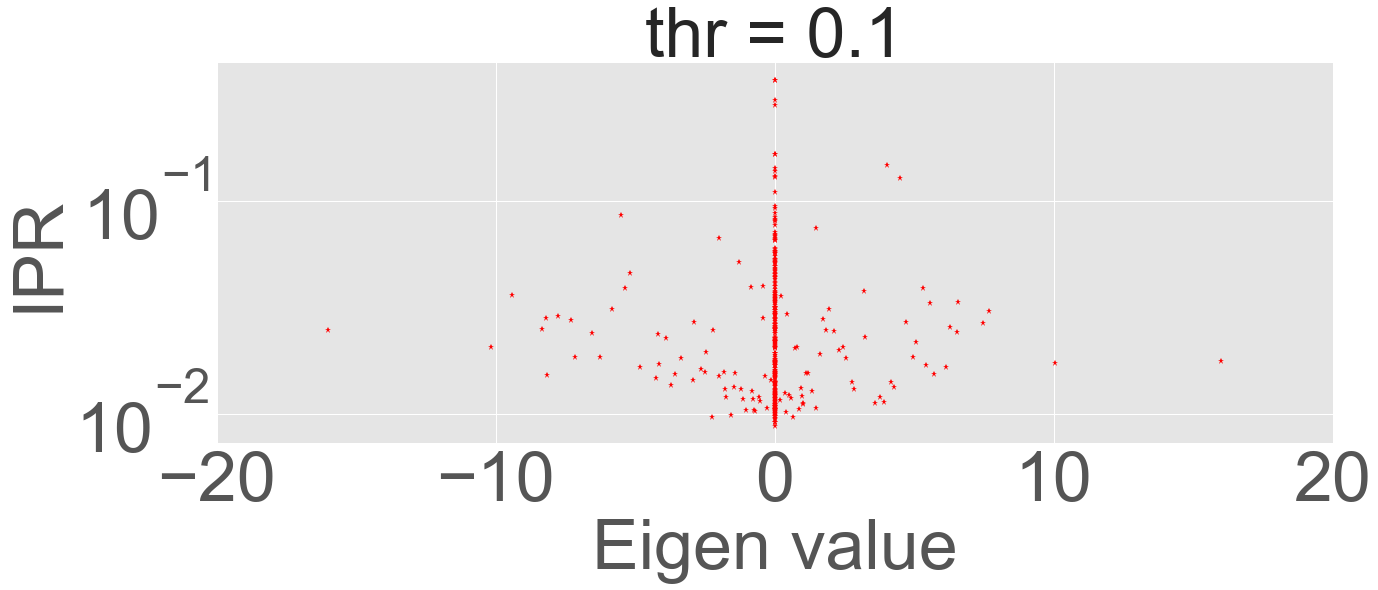

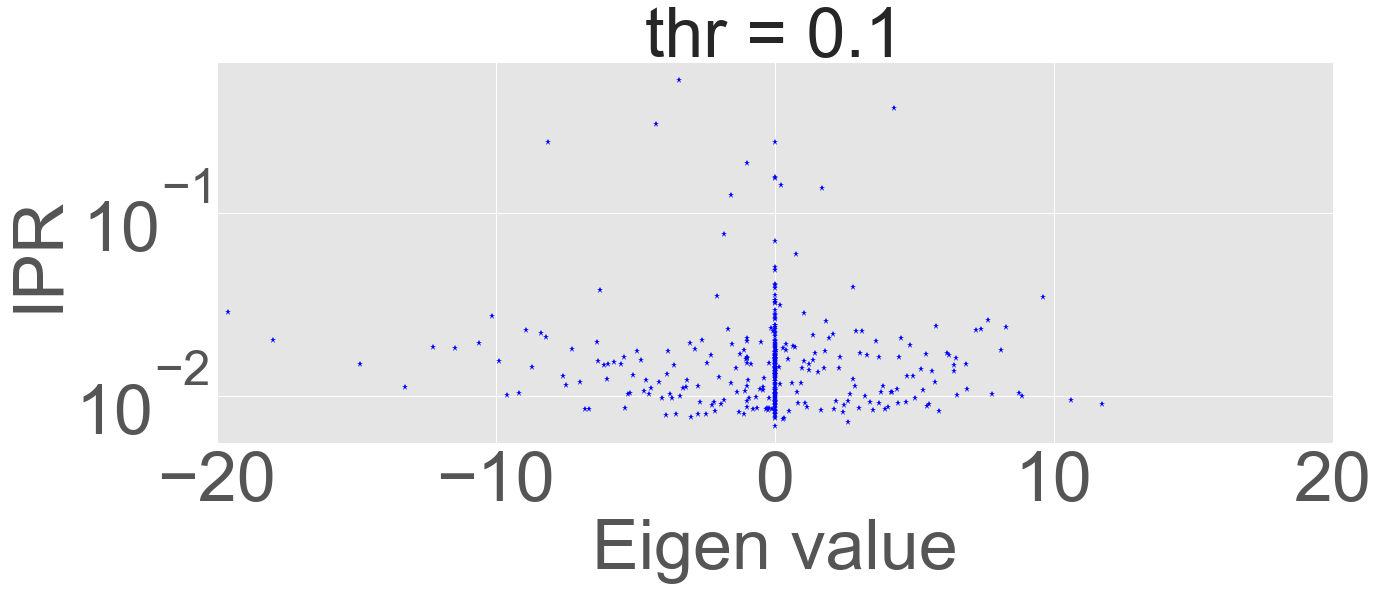

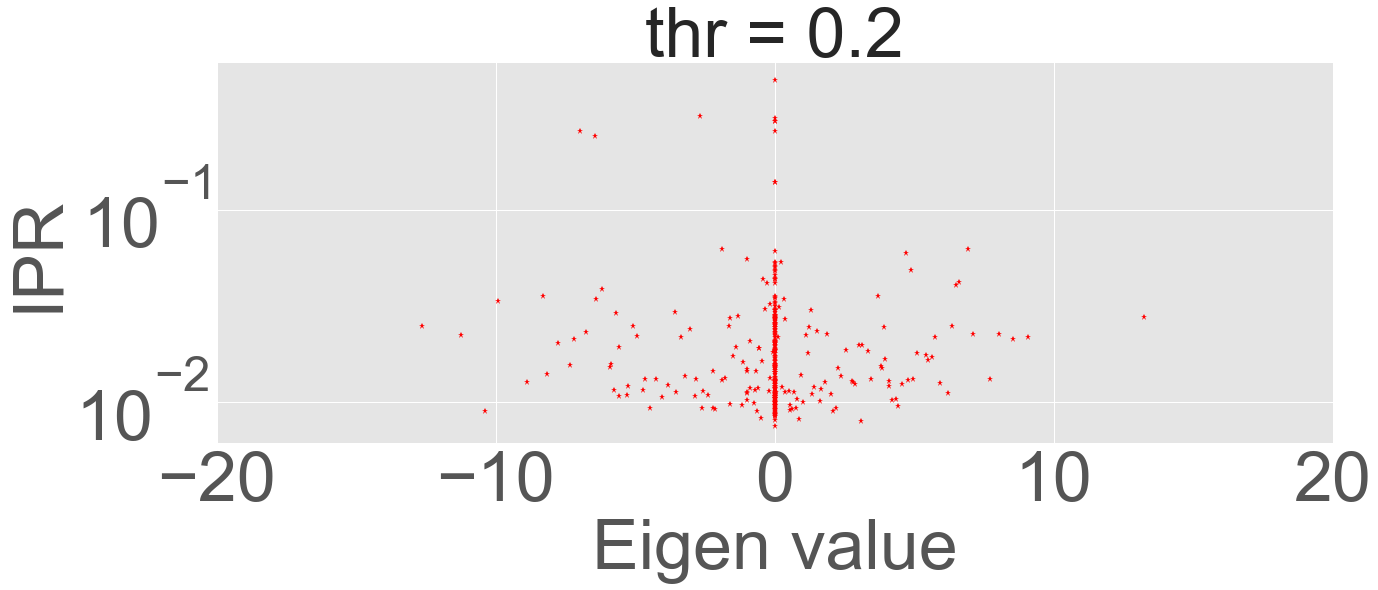

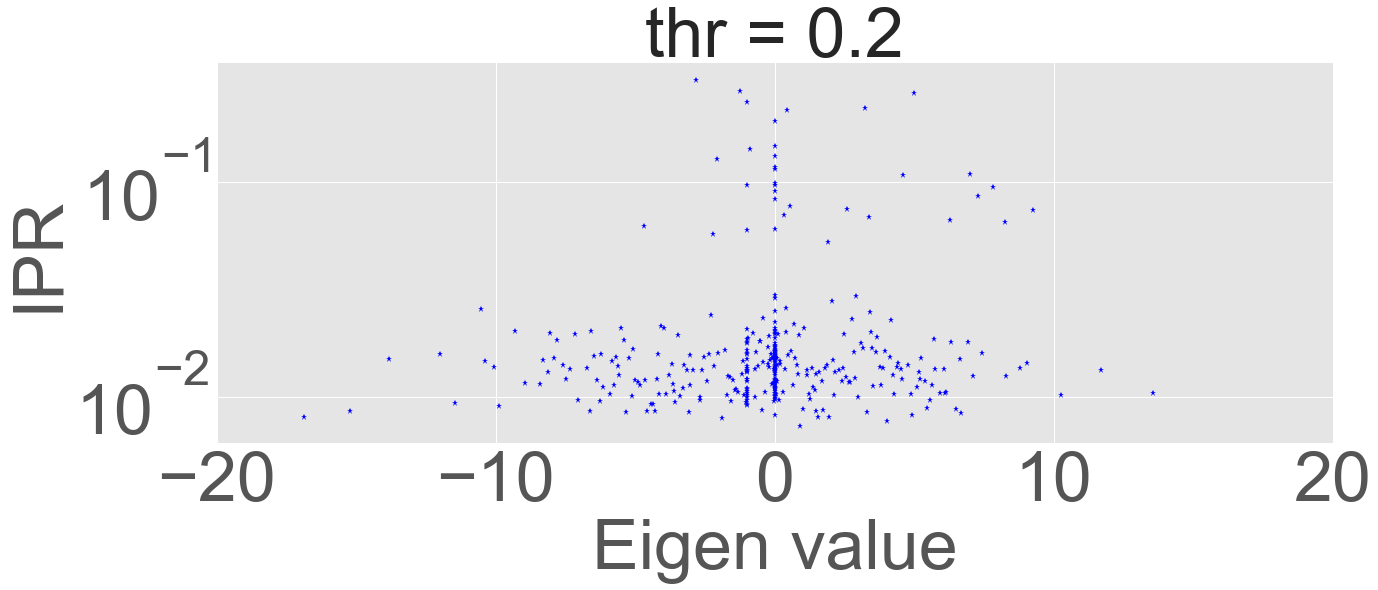

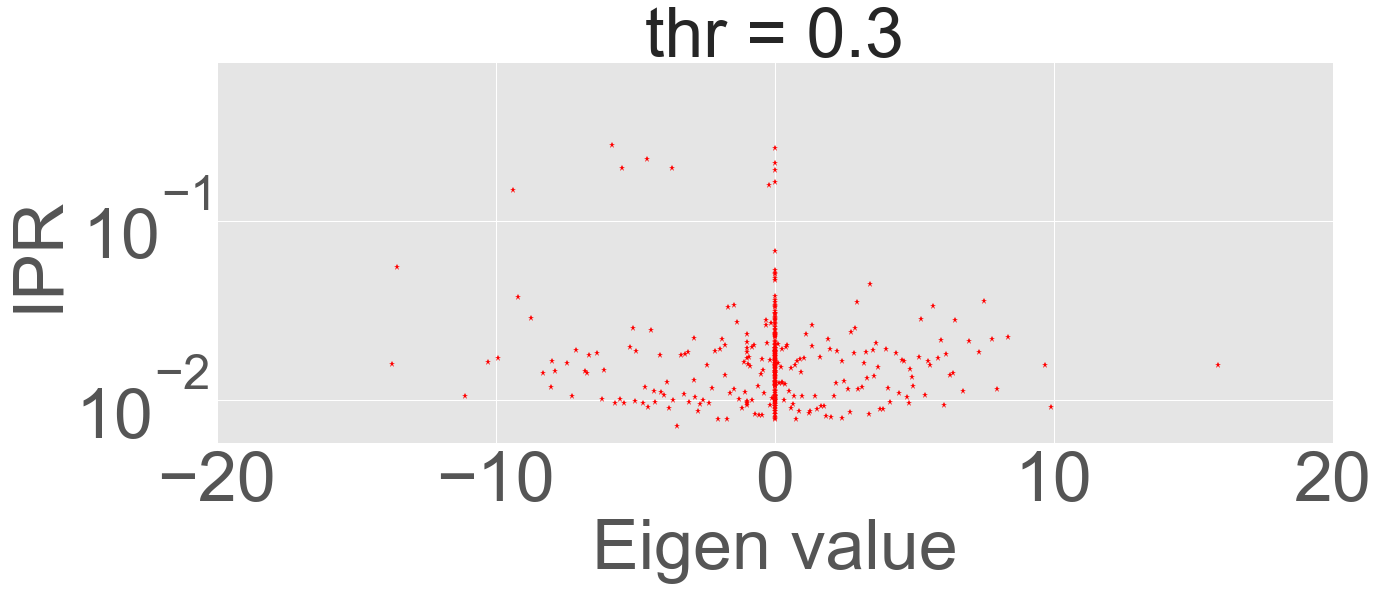

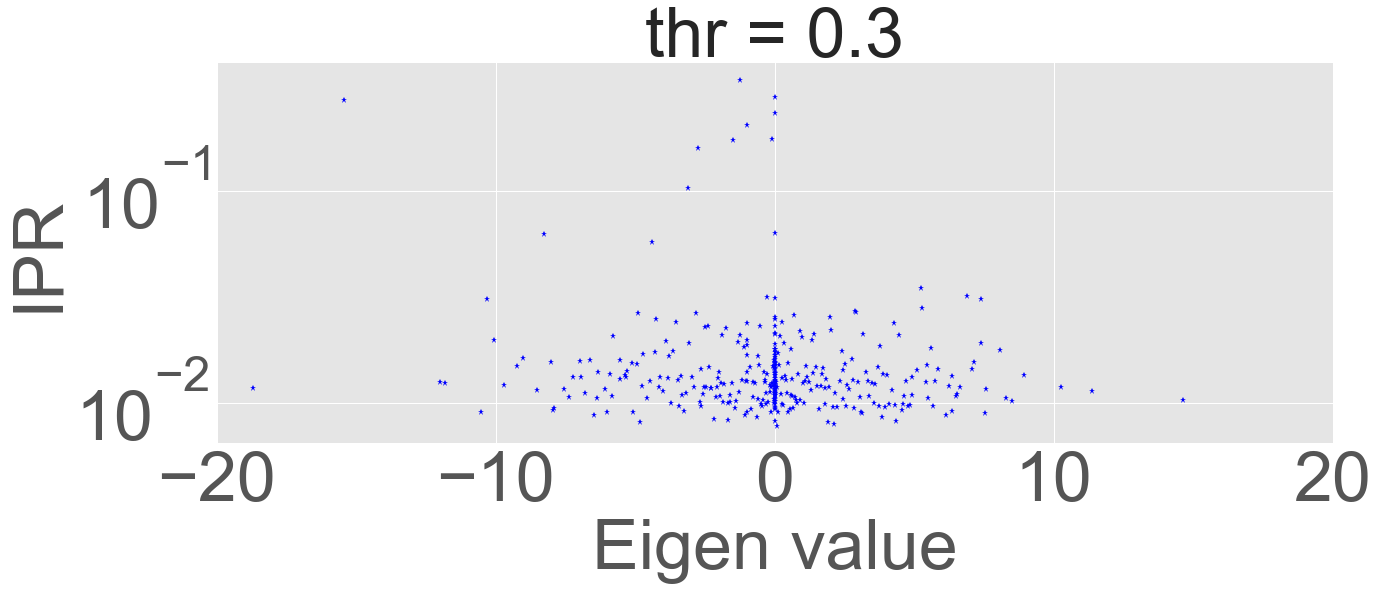

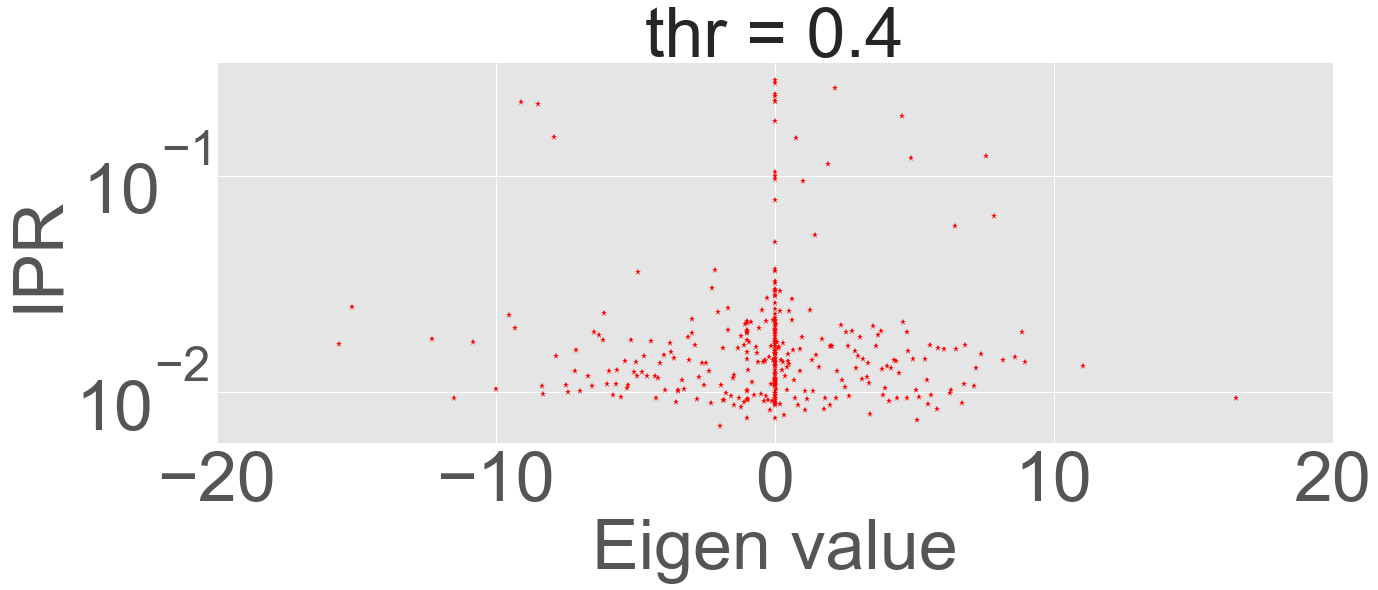

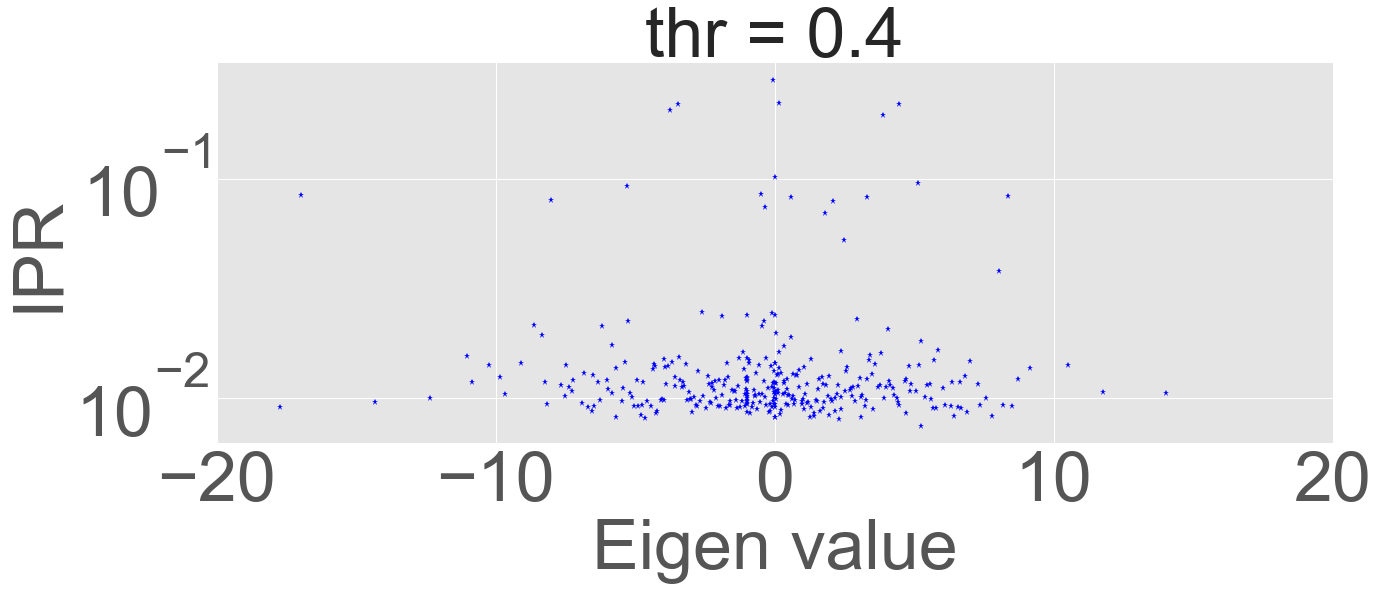

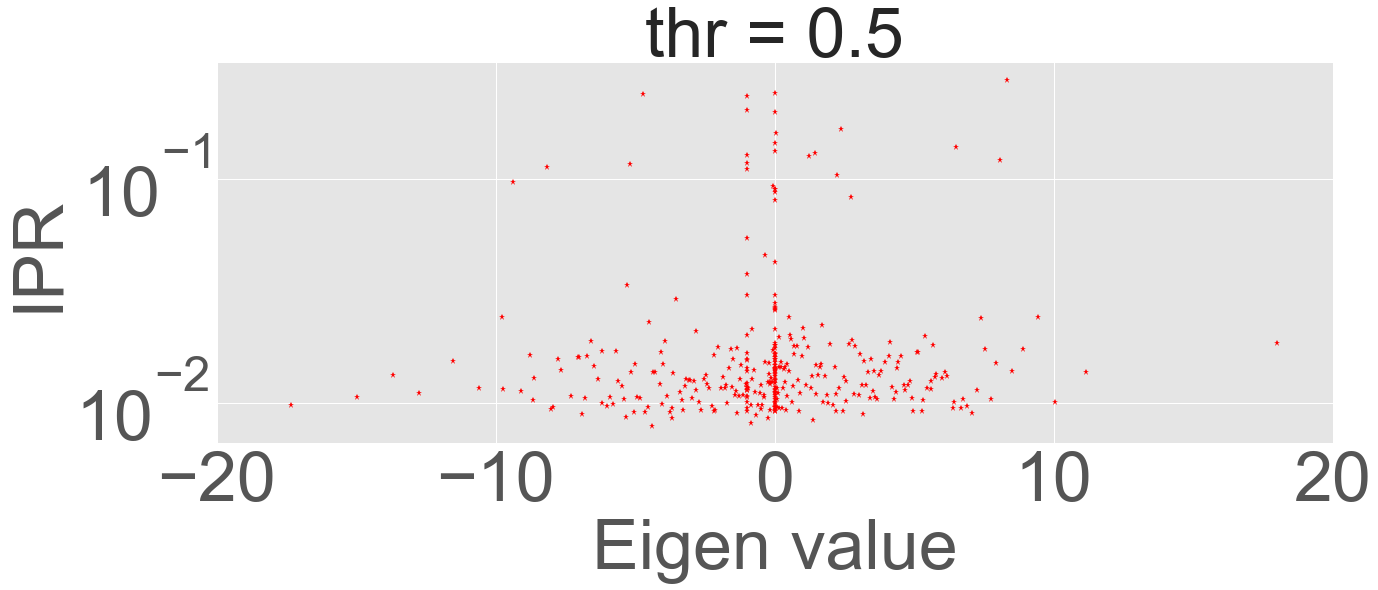

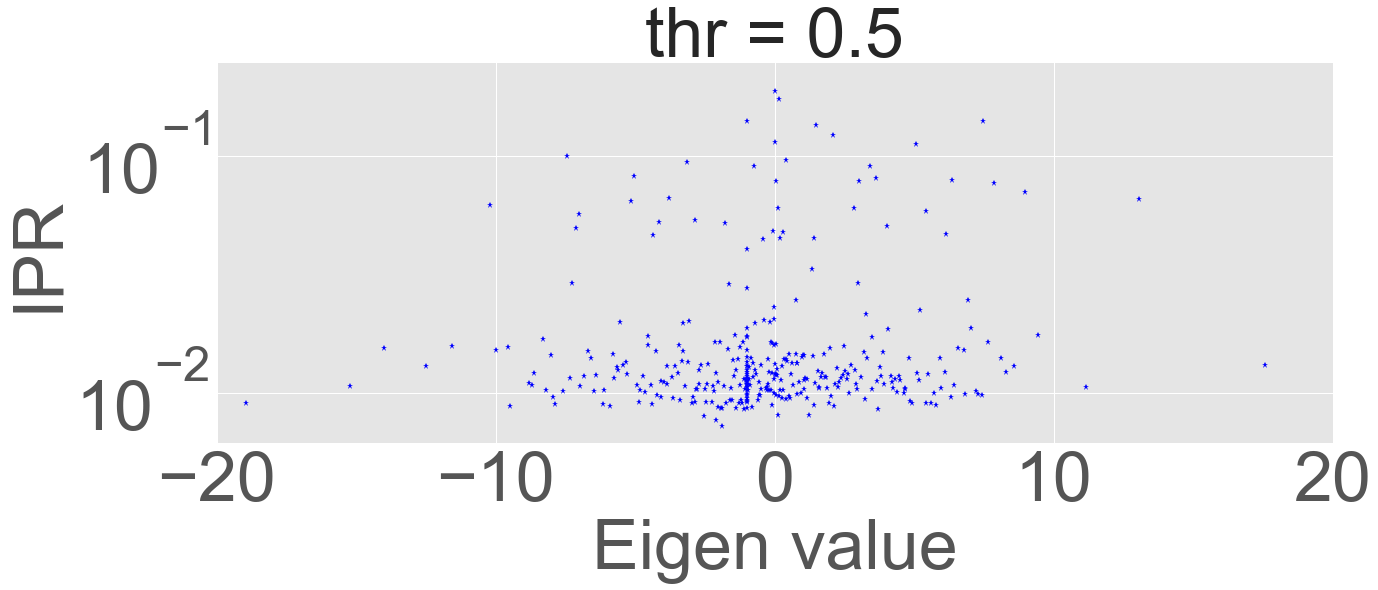

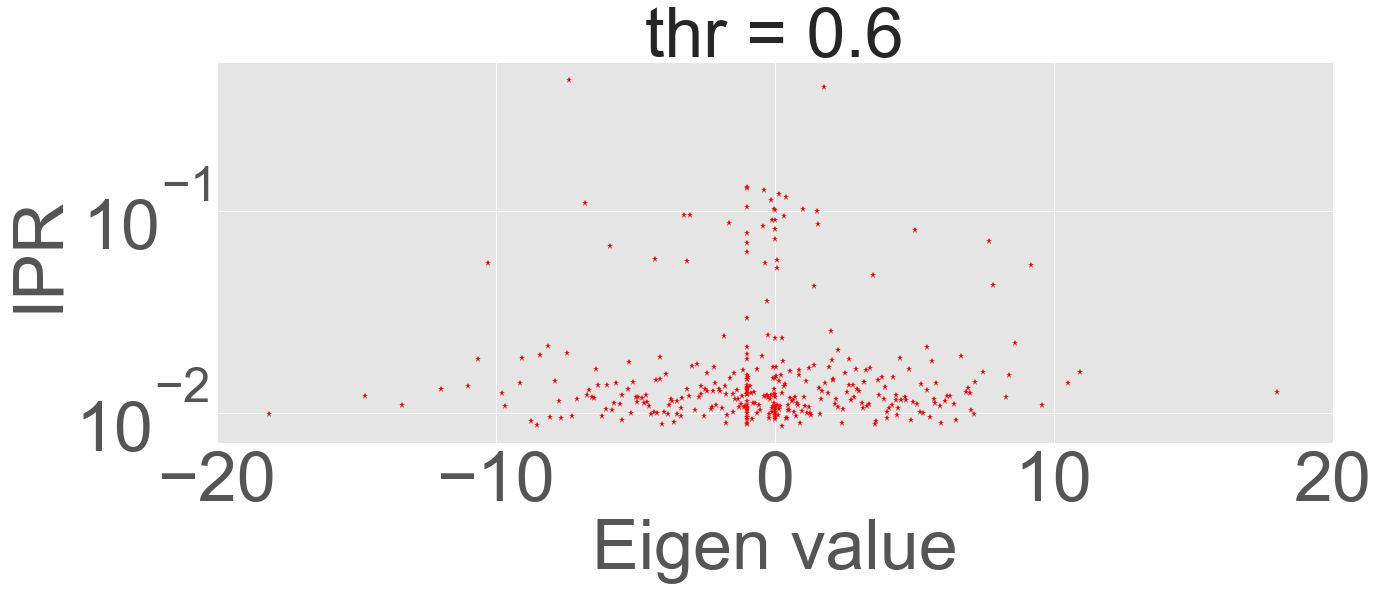

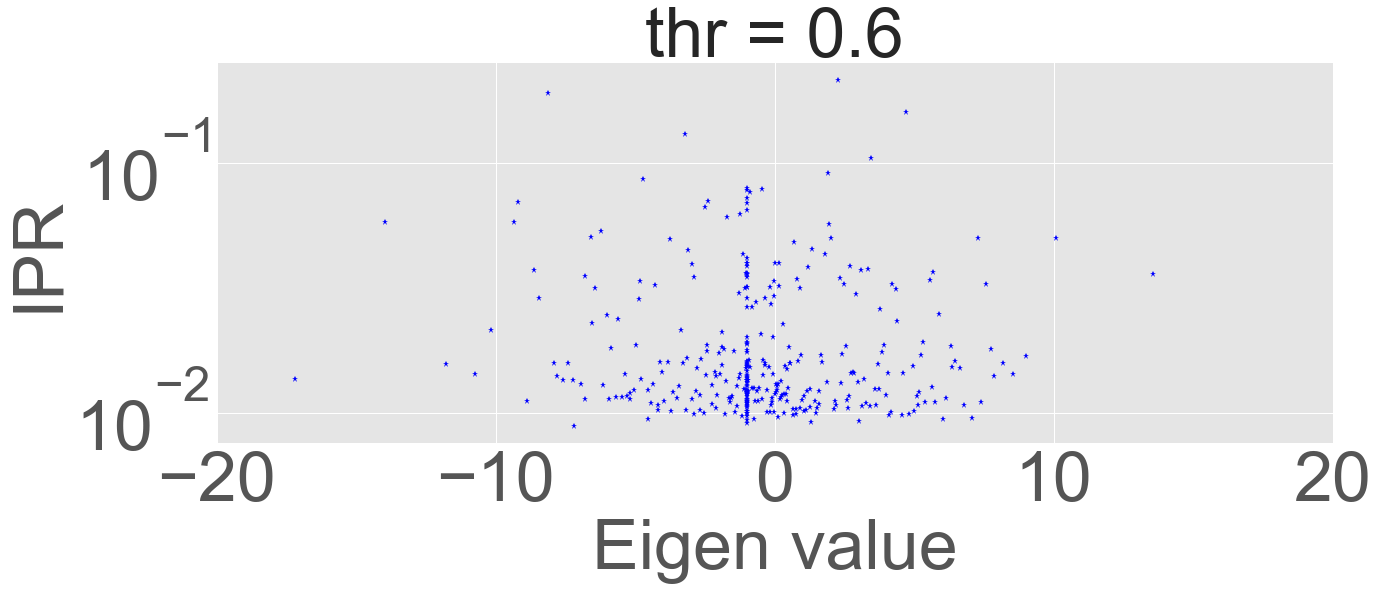

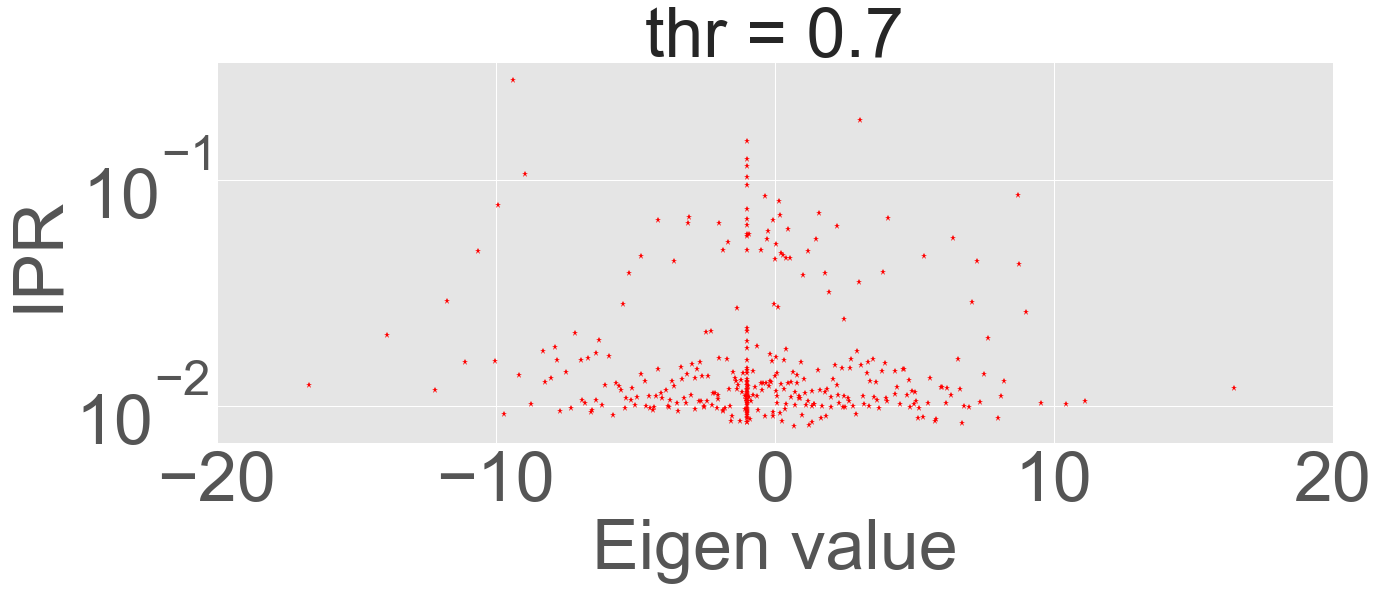

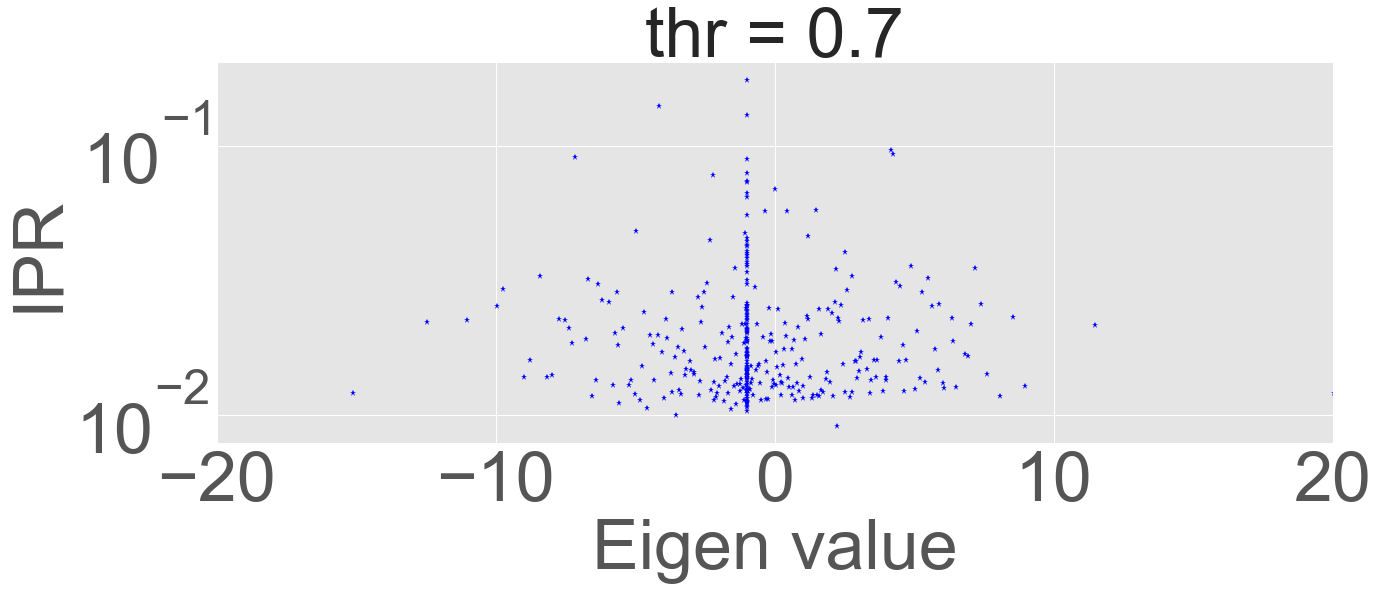

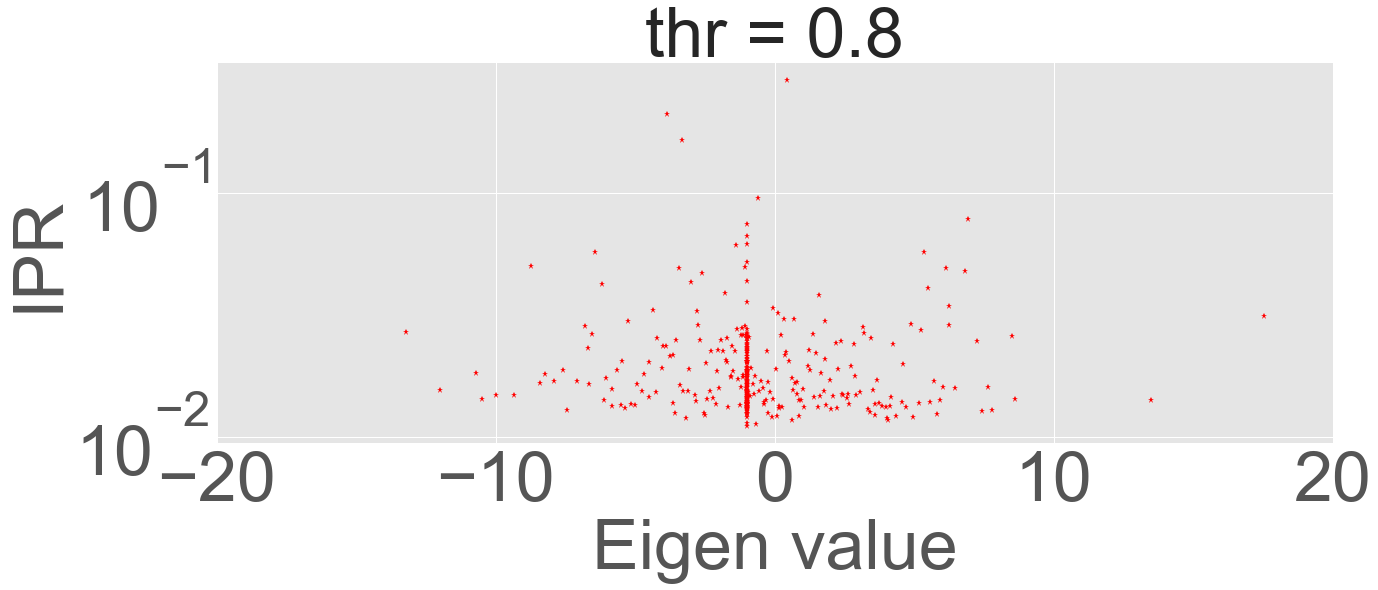

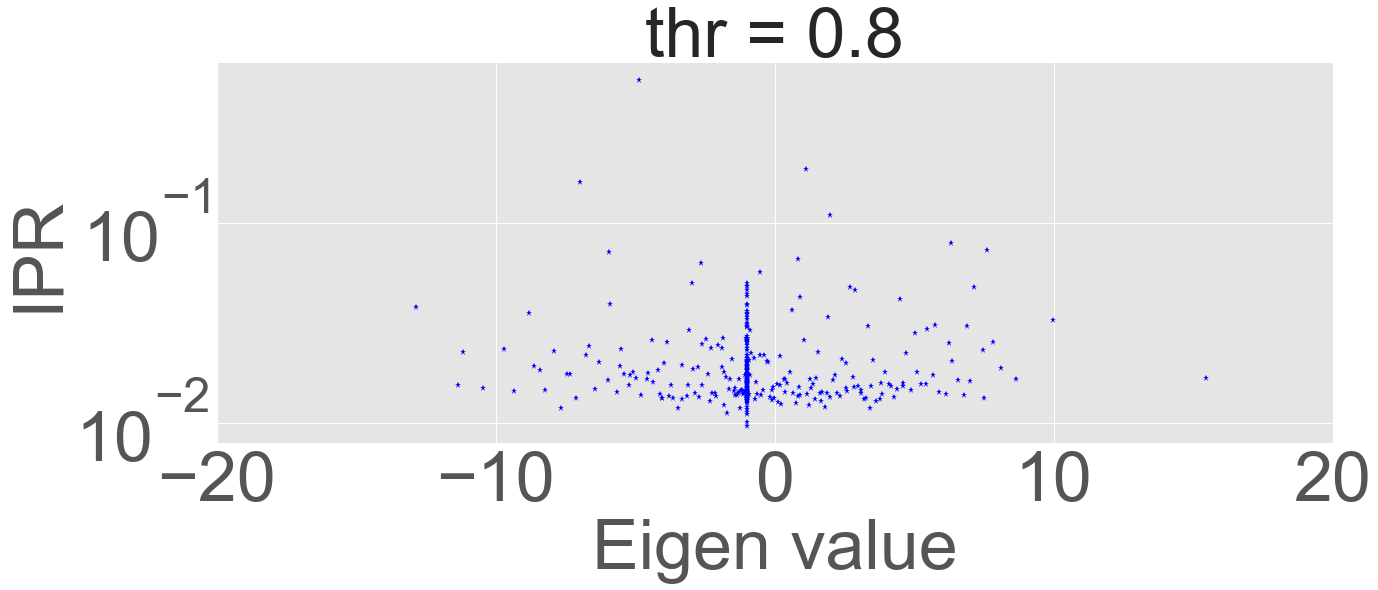

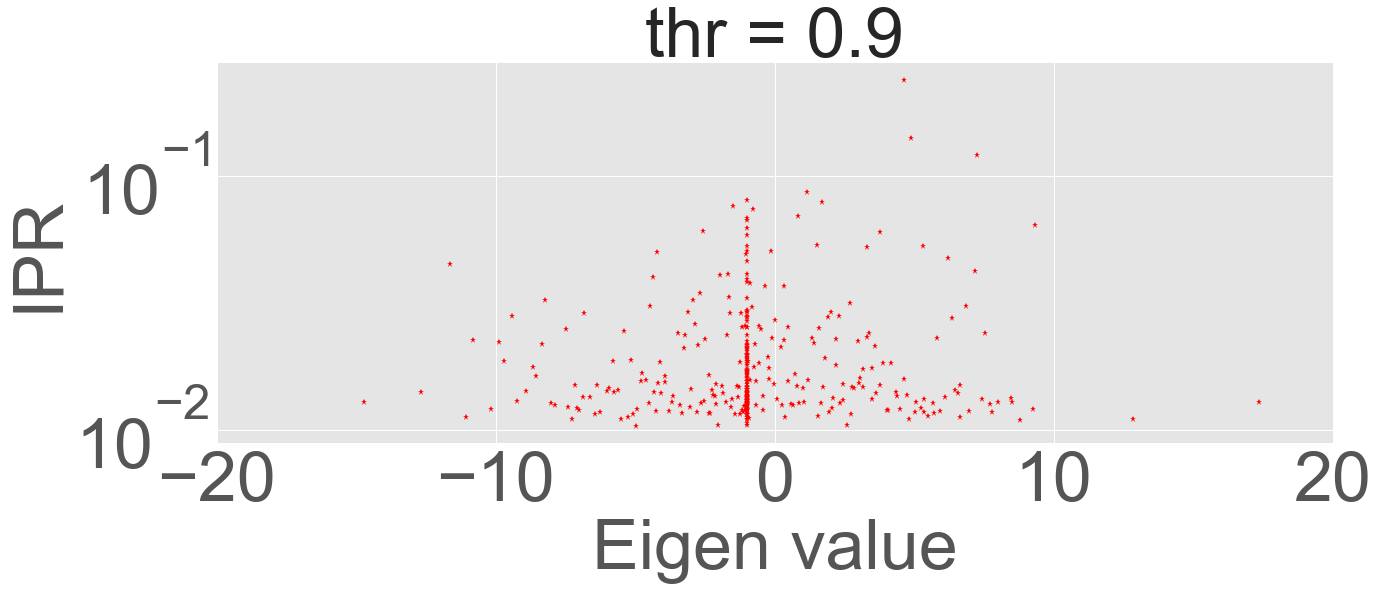

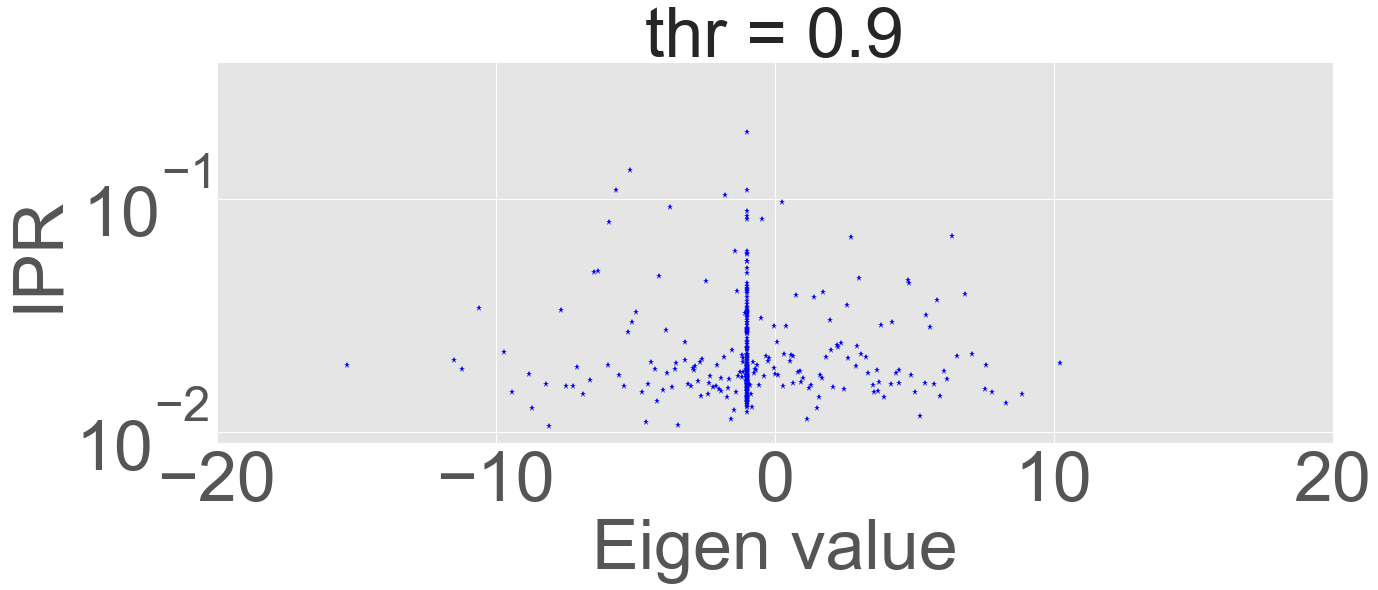

In [49]:
def plot_IPR_eigen(IPR, eigenvalues, id_group):
    ids = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[ids]
    IPR = IPR[ids]
    colors = ['red', 'blue']
    plt.plot(eigenvalues, IPR, '*', c = colors[id_group])
    ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlabel('Eigen value', size=fontsize)
    ax.set_ylabel('IPR', size=fontsize)
    ax.set_xlim([-20, 20])
    
def plot_IPR_eigen_sample(parenclitics, id_thr, thr_p, id_sample, fig):
    eigenvalues = parenclitics[id_thr]['eigenvalues'][id_sample]
    #print y[id_sample], np.sort(abs(eigenvalues))
    IPR = parenclitics[id_thr]['IPR'][id_sample]
    plt.figure(fig.number)
    plt.title("thr = " + str(thr_p), size=fontsize)
    plot_IPR_eigen(IPR, eigenvalues, y[id_sample])


id_thr = 6
figs = [plt.figure(figsize=(20, 7)), plt.figure(figsize=(20, 7))]
#for id_sample in config.params["id_sample"]:
    #print id_sample, '/', config.params["id_sample"].num_ticks
    #if id_sample > 11:
    #    break
    #plot_IPR_eigen_sample(parenclitics, id_sample, figs[y[id_sample]])
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, thr_p = thr_p, id_sample = 0, fig = plt.figure(figsize=(20, 7)))
    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, thr_p = thr_p, id_sample = 5, fig = plt.figure(figsize=(20, 7)))

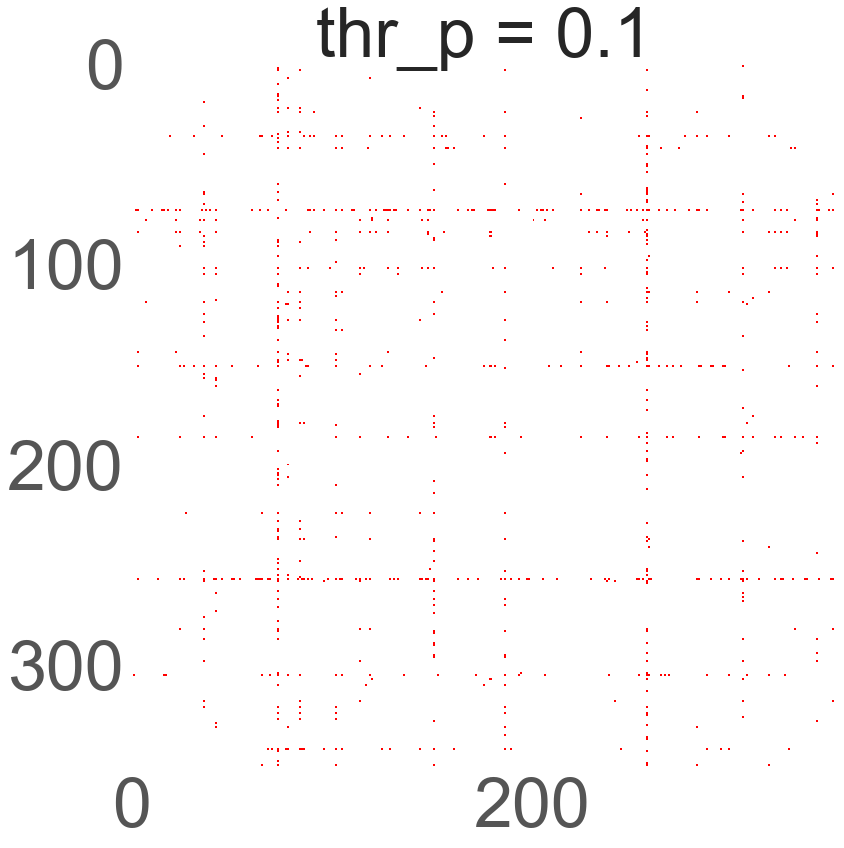

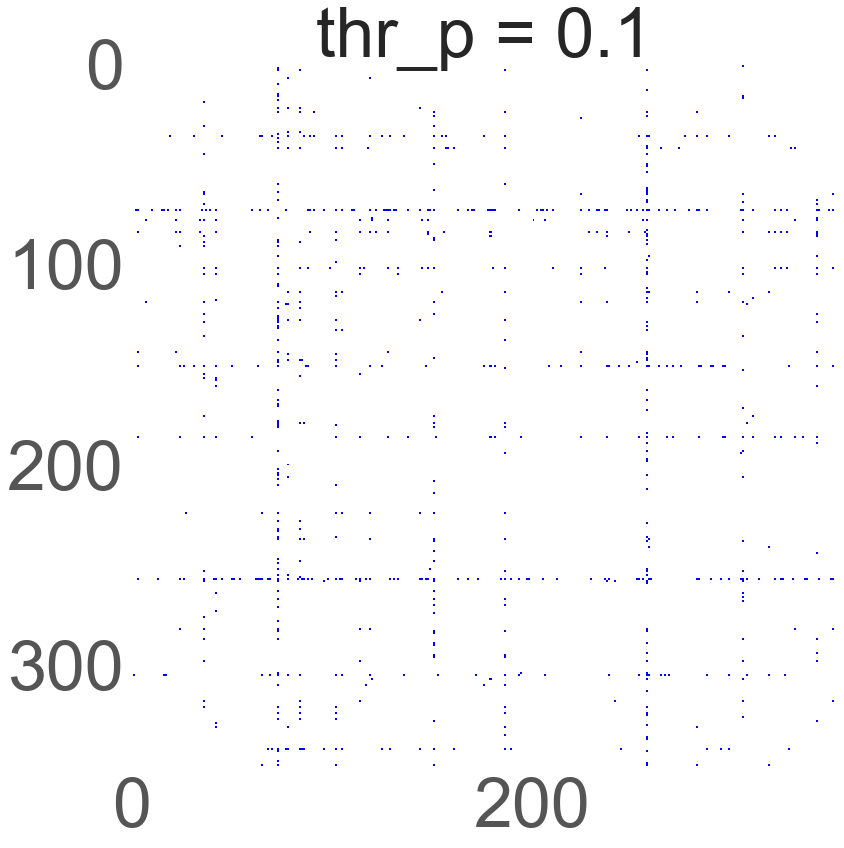

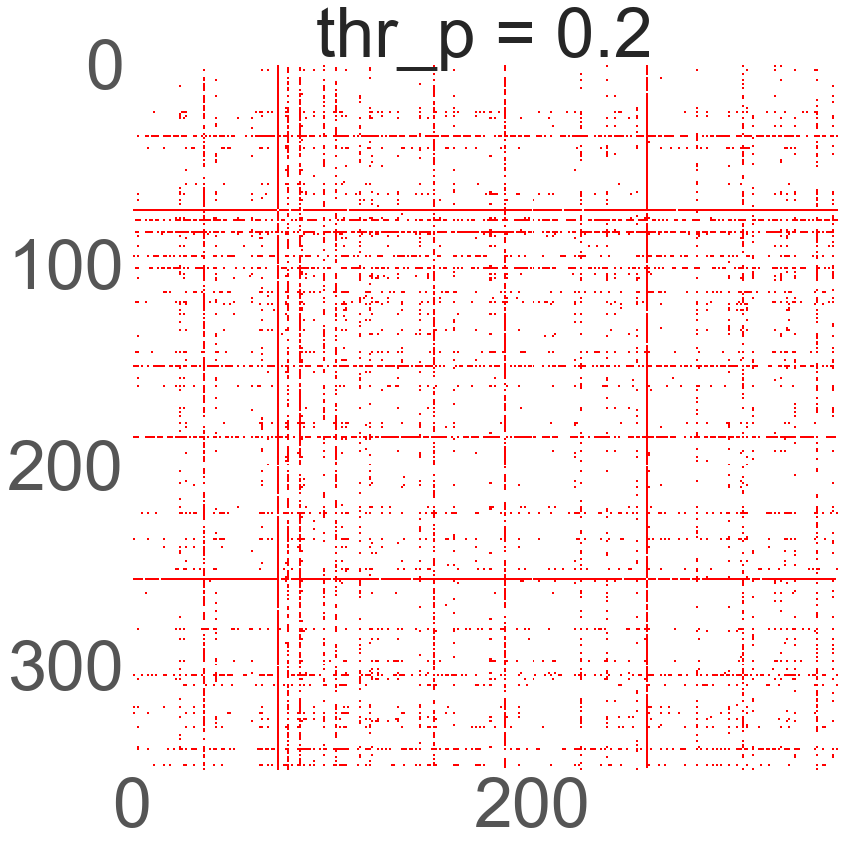

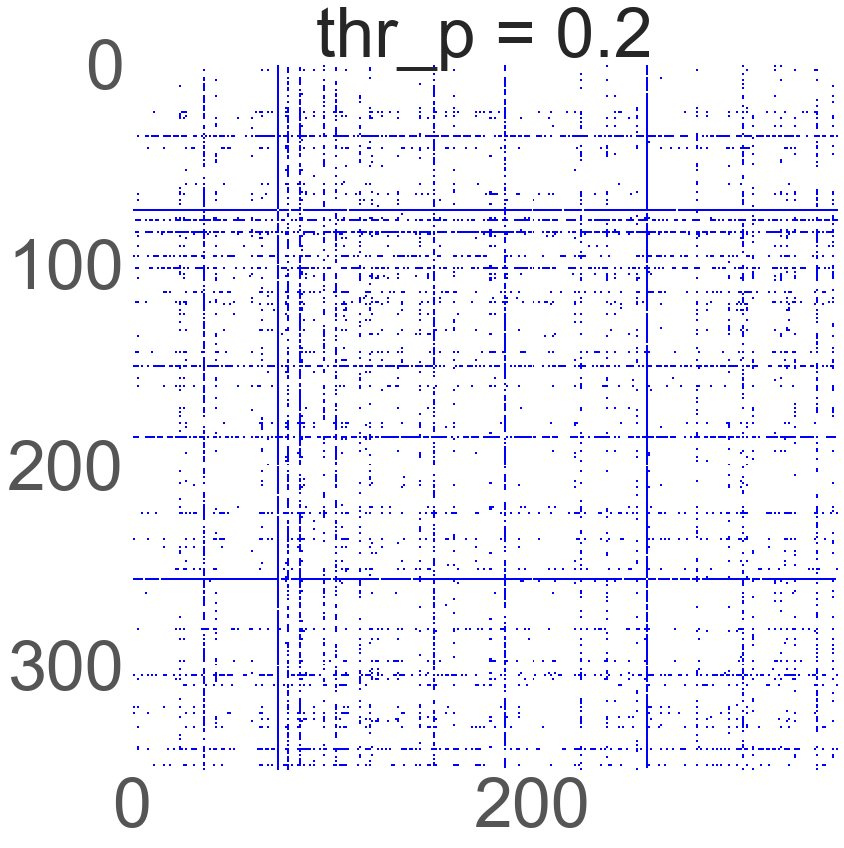

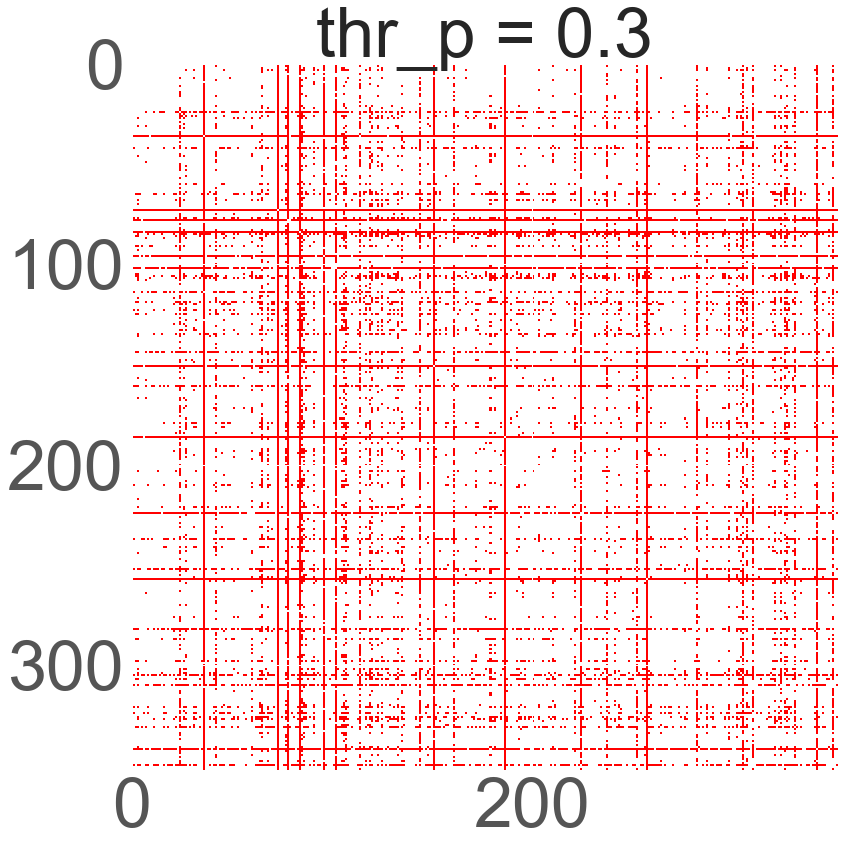

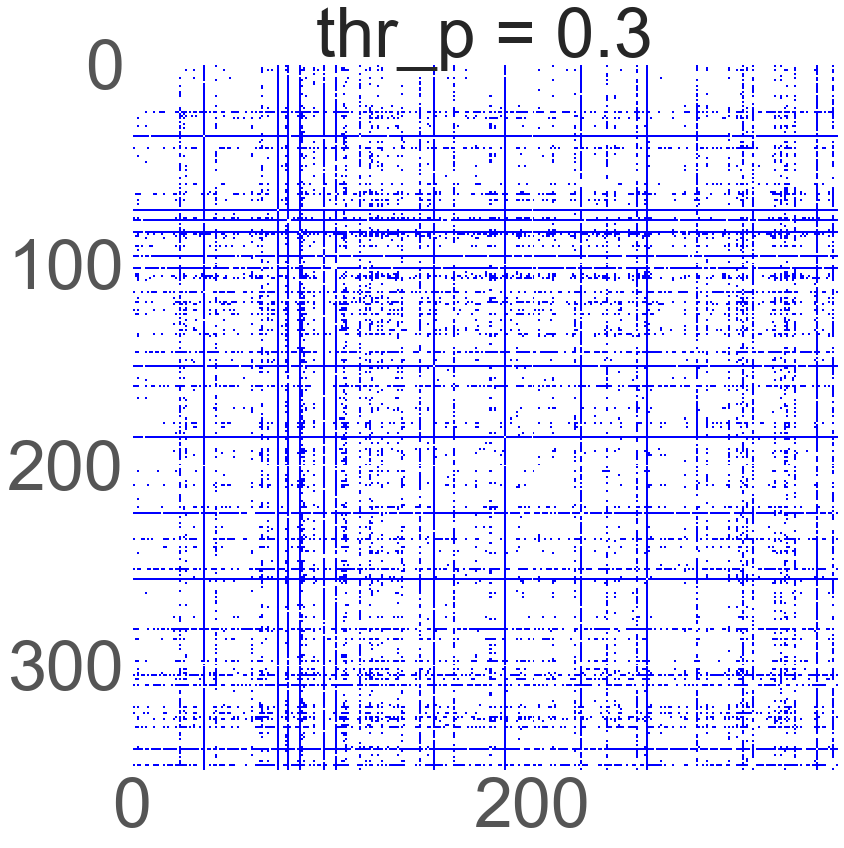

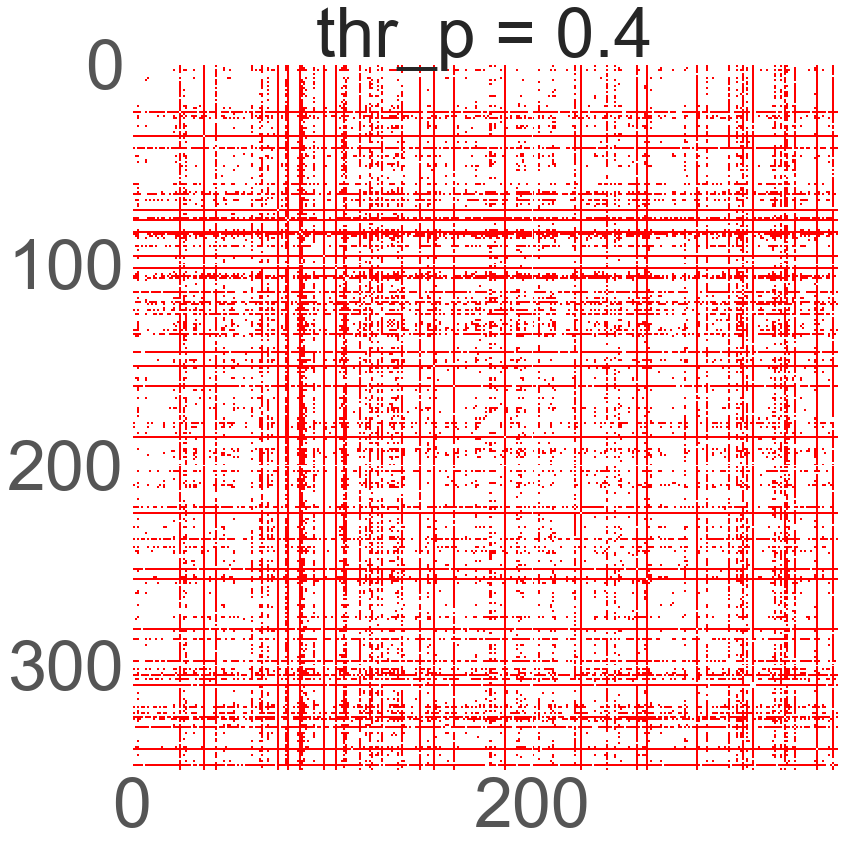

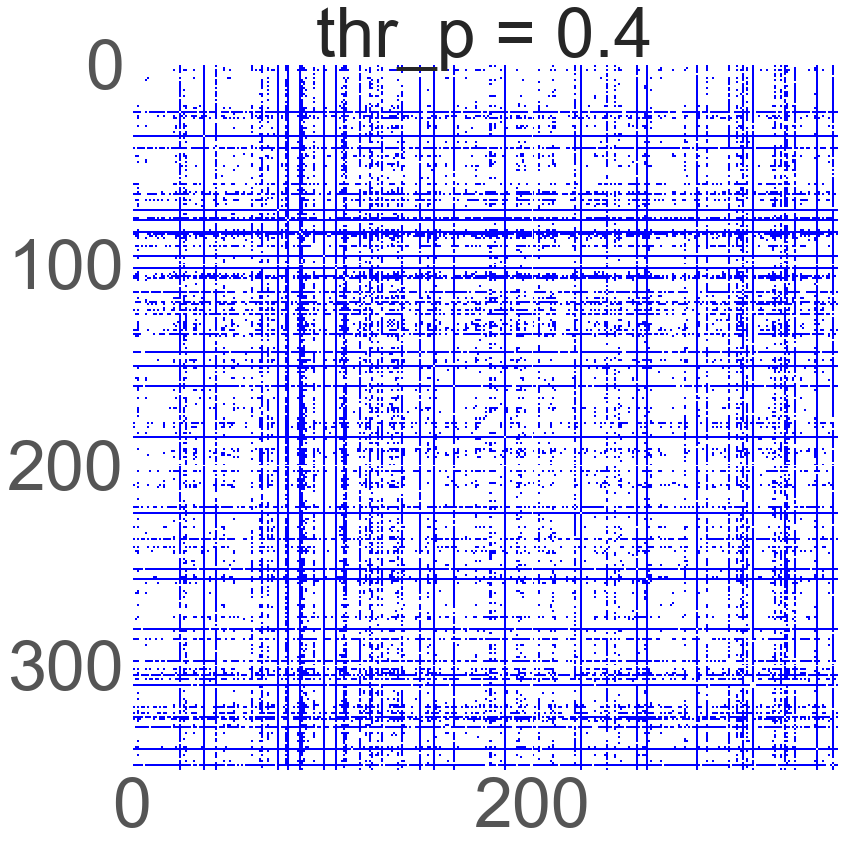

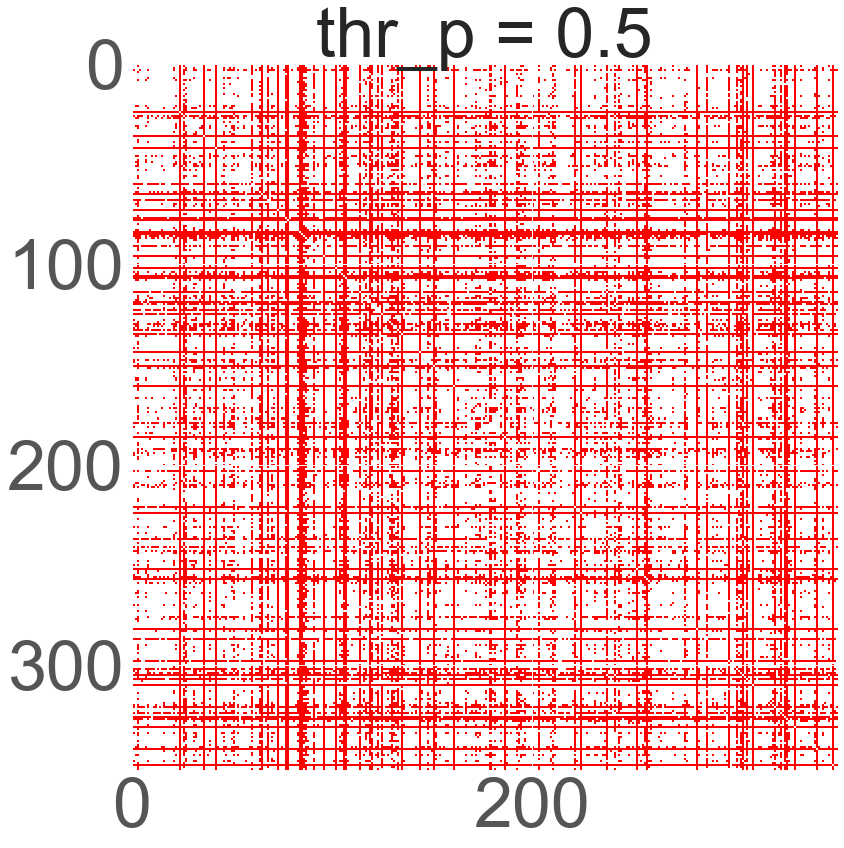

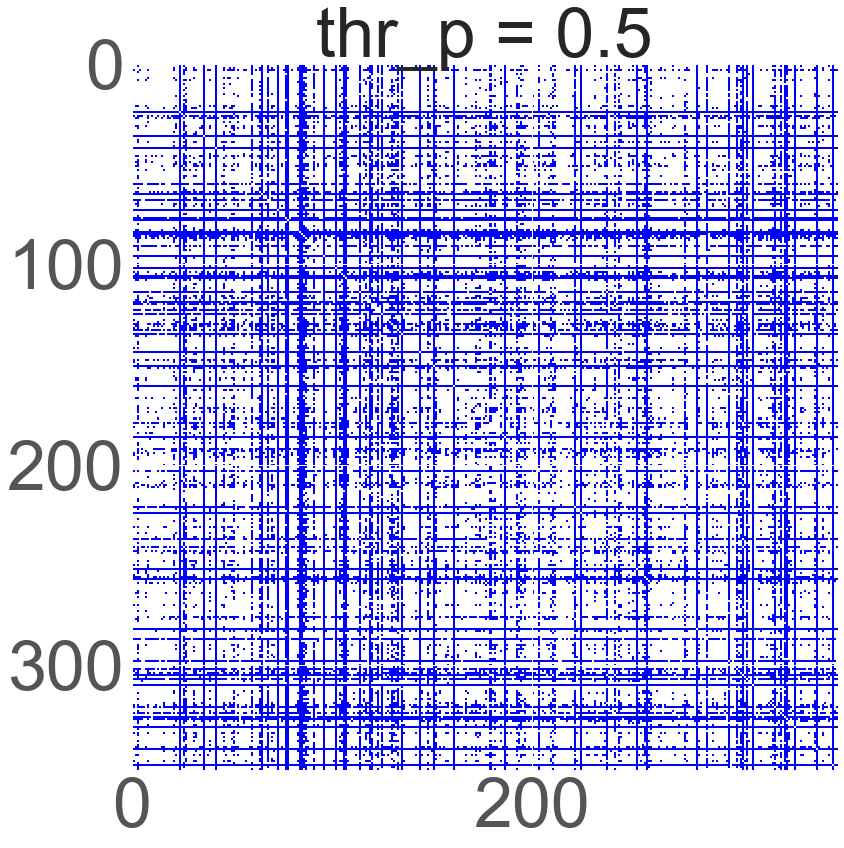

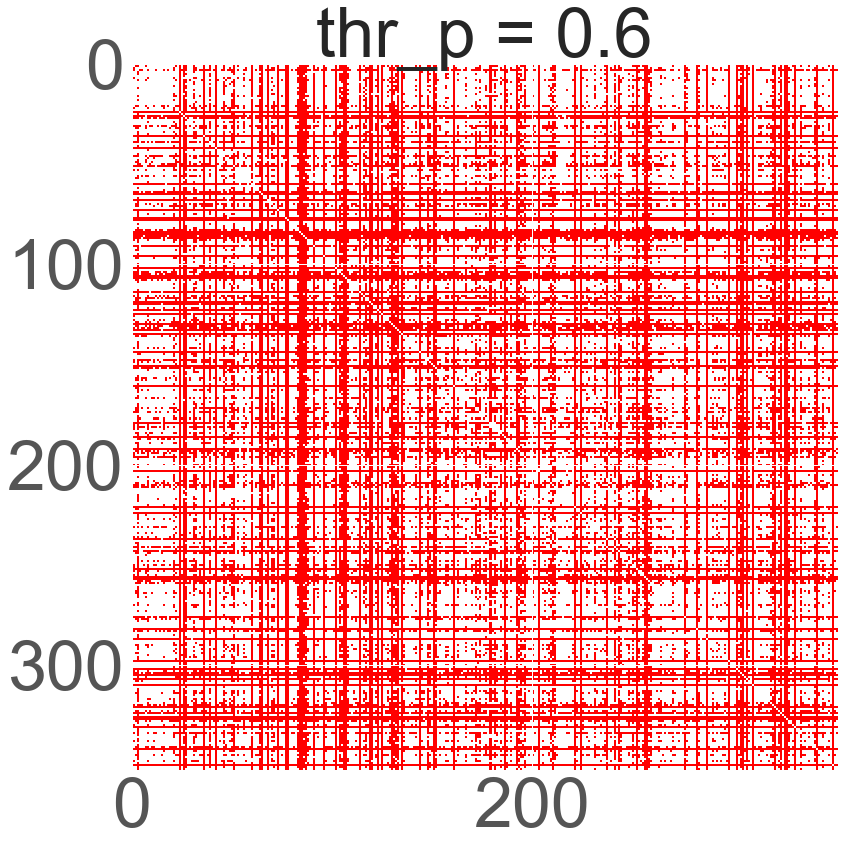

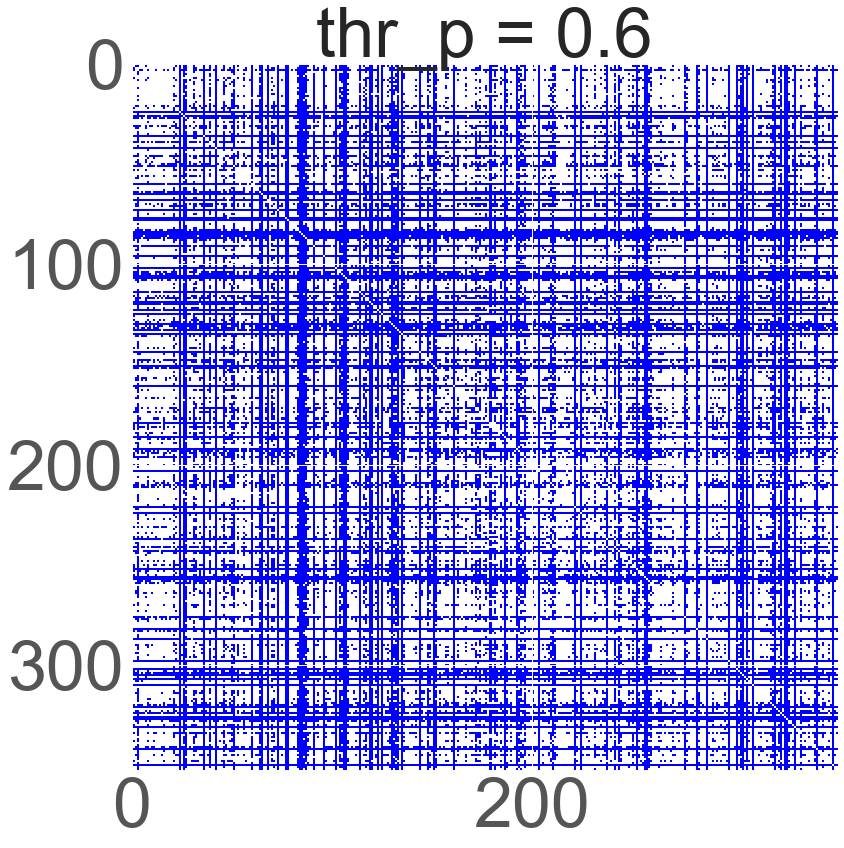

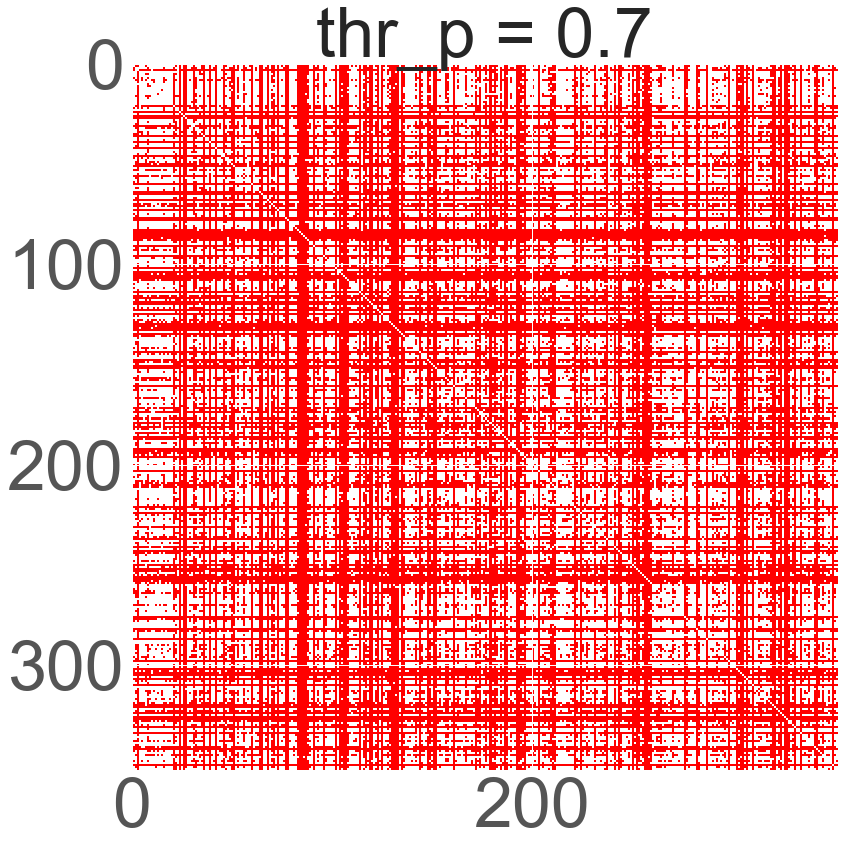

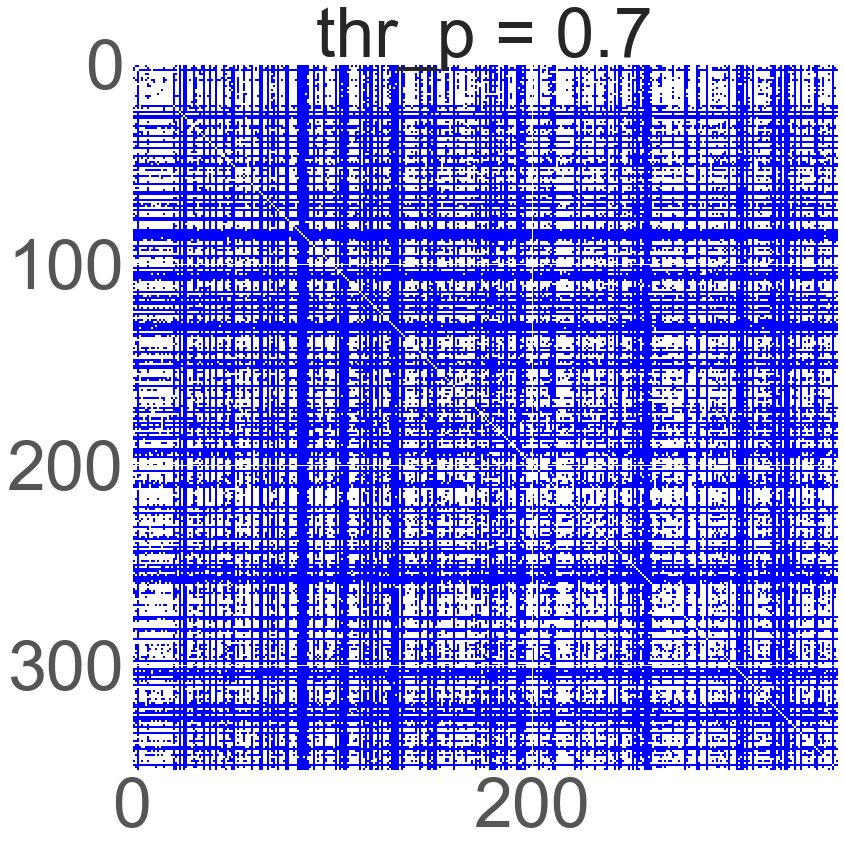

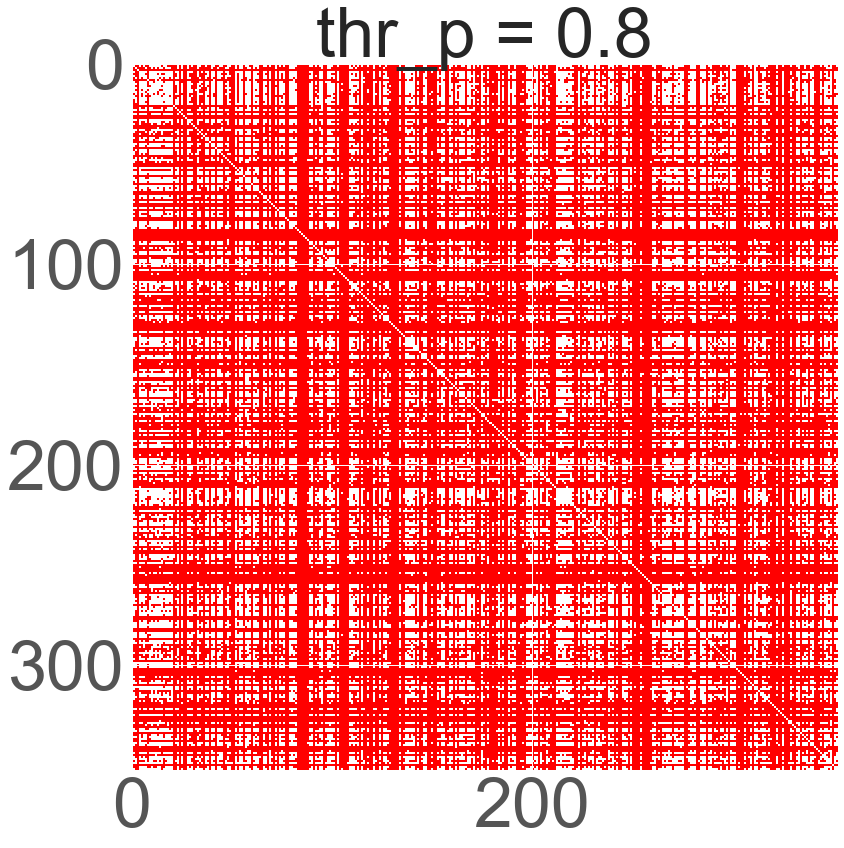

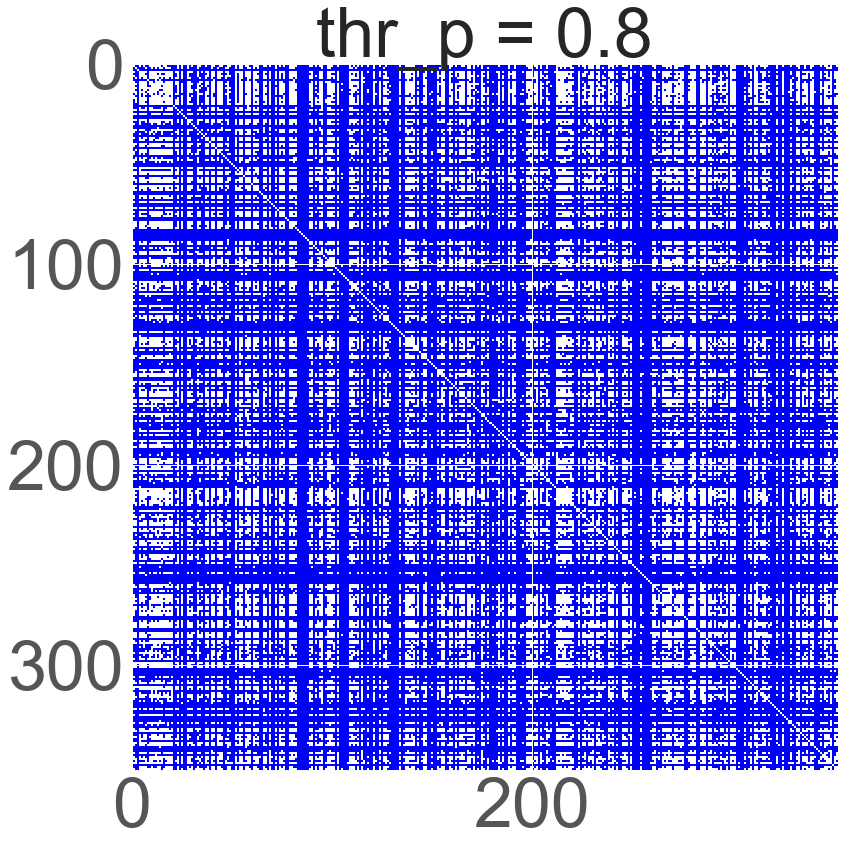

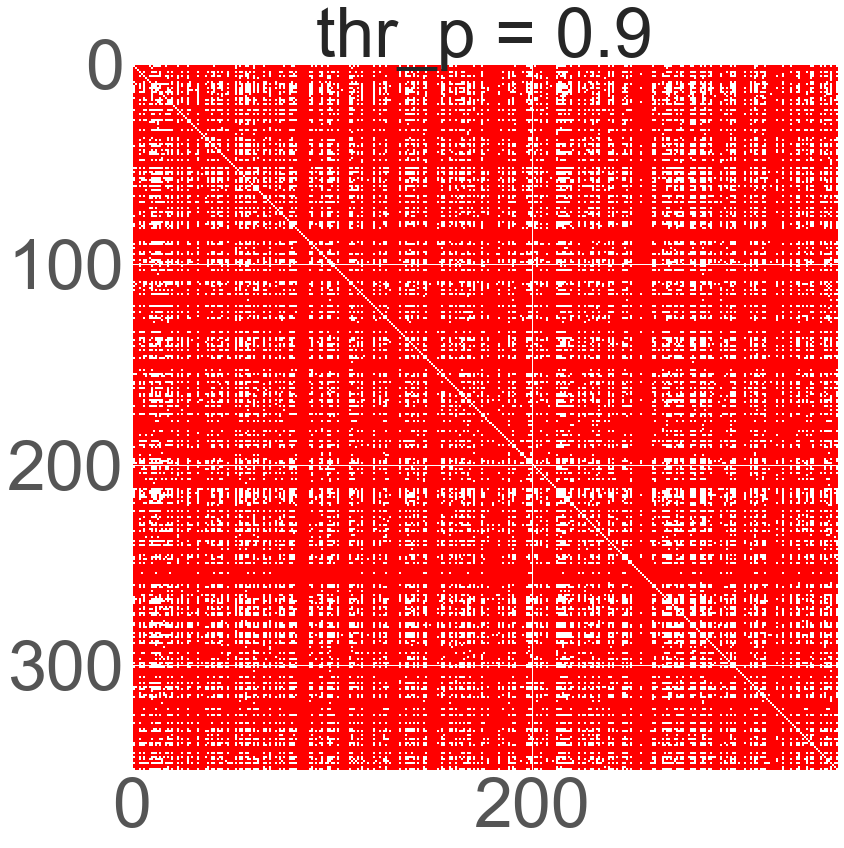

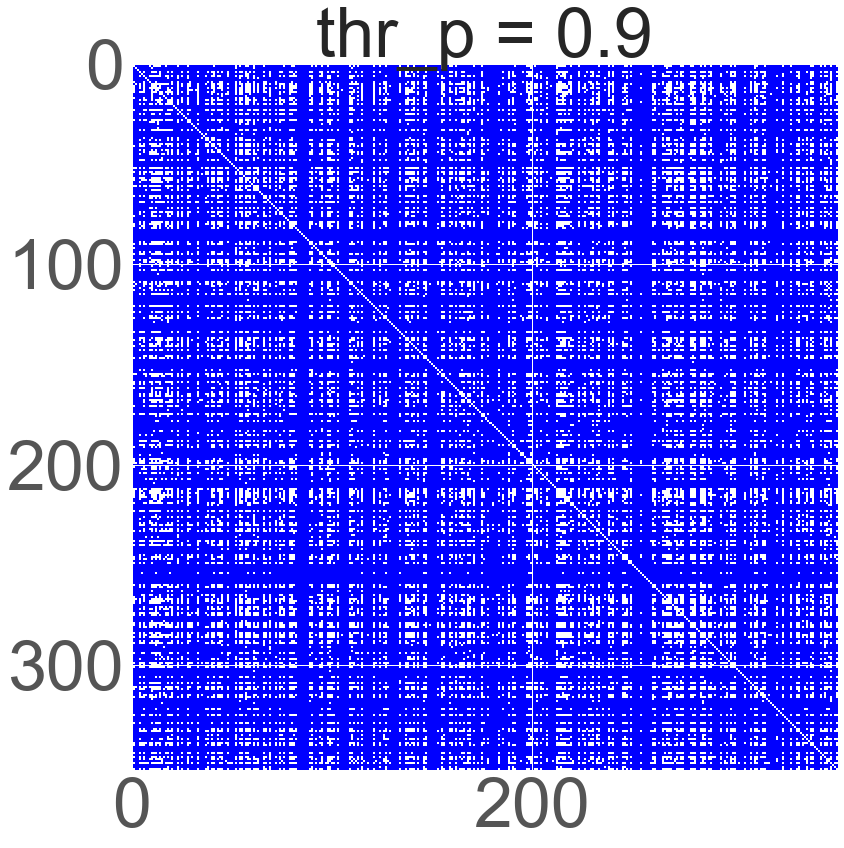

In [79]:
def load_graph(id_thr, id_sample):
    data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    g = data['G']
    g = np.unpackbits(g, axis = 1)[:, :X.shape[1]].astype(np.bool)
    g = igraph.Graph.Weighted_Adjacency(g.tolist(), mode=igraph.ADJ_UNDIRECTED)
    return g

def plot_adjacency(g, title_name, id_group, fig = None):
    import matplotlib.colors
    if fig is None:
        fig = plt.figure(figsize = (13, 13))
    plt.figure(fig.number)
    colors = ['red', 'blue']
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", colors[id_group]])
    plt.title(title_name, size = fontsize)
    plt.imshow(g.get_adjacency().data, cmap = cmap)
    


for id_thr, thr_p in enumerate(config.params["thr_p"]):
    id_sample = 0
    g = load_graph(id_thr, id_sample)
    plot_adjacency(g, 'thr_p = ' + str(thr_p), y[id_sample])
    id_sample = 5
    g = load_graph(id_thr, id_sample)
    plot_adjacency(g, 'thr_p = ' + str(thr_p), y[id_sample])

